# Graded Challenge 2

---



- Andik Al Fauzi - FTDS-RMT-018

# SQL Query to get data from Big Query

---



In [ ]:
# Load Data from Google Big Query

# SELECT report_date,load_time, load_type, load_weight, dropoff_site FROM bigquery-public-data.austin_waste.waste_and_diversion
# WHERE report_date BETWEEN '2021-01-01' AND '2021-12-31'

# Data Preparation

---



In [ ]:
# Importing Library

import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statistics

In [ ]:
# Load Data CSV

df = pd.read_csv('/content/h8dsft_P0W2_Andik_Al_Fauzi.csv')

In [ ]:
# Create a copy data
# Reason : make sure the original data is untouchable

dfCopy = df.copy()

In [ ]:
# show 10 row of data

dfCopy.head()

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08 12:00:00.000000 UTC,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00.000000 UTC,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00.000000 UTC,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00.000000 UTC,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00.000000 UTC,TIRES,1400.0,MRF


In [ ]:
# Cek row & column data

dfCopy.shape

(26157, 5)

In [ ]:
# Cek data 

dfCopy.describe()

,load_weight
count,25109.000000
mean,12227.136307
std,7135.059565
min,0.000000
25%,7060.000000
50%,11300.000000
75%,16380.000000
max,245540.000000


In [ ]:
# Cek data type

dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   26157 non-null  object 
 1   load_time     26157 non-null  object 
 2   load_type     26157 non-null  object 
 3   load_weight   25109 non-null  float64
 4   dropoff_site  26157 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1021.9+ KB


In [ ]:
# Convert kolom report_date to datetime

dfCopy['report_date'] = pd.to_datetime(dfCopy['report_date'])

# Inserting new date format
# reason : karena jika pakai kolom lama maka ada beberapa internal error jika dipanggil variable nya untuk kemudian di plot

dfCopy['date'] = dfCopy['report_date'].dt.date

# Convert kolom load_weight to float
dfCopy['load_weight'] = dfCopy['load_weight'].astype(float)

In [ ]:
# Drop column load_time & report_time because it's unnecessary

dfCopy.drop(['load_time'], axis=1, inplace=True)
dfCopy.drop(['report_date'], axis=1, inplace=True)

In [ ]:
# Cek status convert & drop

dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   load_type     26157 non-null  object 
 1   load_weight   25109 non-null  float64
 2   dropoff_site  26157 non-null  object 
 3   date          26157 non-null  object 
dtypes: float64(1), object(3)
memory usage: 817.5+ KB


note : there was a missing value at the column `load_weight`

In [ ]:
# Cek maximal date from `report_date` column

dfCopy['date'].max()

datetime.date(2021, 7, 9)

note : check the data whether it is in accordance with what is informed in the Assignment (max data on July 09, 2021).

In [ ]:
# Cek total data null

dfCopy.isnull().sum()

load_type          0
load_weight     1048
dropoff_site       0
date               0
dtype: int64

In the `load_weight` column there are 1048 missing value rows

# Problem 1.1 Handle Missing Value

---



In [ ]:
# Insert Missing Value in load_weight with mean
# Reason : Karena kemungkinan missing value tersebut dapat diisi dengan rata-rata sampah yang diangkut pada setiap sitenya

dfCopy.fillna(dfCopy['load_weight'].mean(), inplace=True)

In [ ]:
# Cek data null yang sudah diinsert

dfCopy.isnull().sum()

load_type       0
load_weight     0
dropoff_site    0
date            0
dtype: int64

Note: replacing null data has been successful by entering the mean value of the `load_weight` column.

# Problem 1.2.1 : Melihat rentang waktu pengambilan data

---



In [ ]:
# Cek total data

dfCopy['date'].max() - dfCopy['date'].min()

datetime.timedelta(days=189)

note : There are 189 day of range data

# Problem 1.2.2 : Ada apa saja tipe load sampah di kota Austin berdasarkan data

---



In [ ]:
# Cek Unique Data kolom load_type

dfCopy.load_type.unique()

array(['TIRES', 'RECYCLING - SINGLE STREAM', 'SWEEPING', 'BRUSH',
       'GARBAGE COLLECTIONS', 'YARD TRIMMING', 'BULK', 'ORGANICS',
       'DEAD ANIMAL', 'MIXED LITTER', 'LITTER', 'RECYCLED METAL',
       'CONTAMINATED RECYCLING', 'CONTAMINATED ORGANICS'], dtype=object)

In [ ]:
# Cek unique di kolom dropoff_site

dfCopy.dropoff_site.unique()

array(['MRF', 'TDS - MRF', 'ONION CREEK', 'PARK CENTER', 'HORNSBY BEND',
       'TDS LANDFILL', 'GREAT NORTHERN', 'ORGANICS BY GOSH',
       'BALCONES RECYCLING', 'ON ROUTE HIGH DUMP',
       'AUSTIN IRON AND METAL', 'PARK BEND', 'BALCONES WOODS',
       'STEINER LANDFILL', 'WESTFIELD', 'ST. EDWARDS',
       'AUSTIN WOOD RECYCLING', 'WILCAB'], dtype=object)

In [ ]:
# Cek Total Data di masing-masing load_type

dfCopy['load_type'].value_counts()

GARBAGE COLLECTIONS          8242
RECYCLING - SINGLE STREAM    6760
ORGANICS                     5763
BULK                         1594
BRUSH                        1517
SWEEPING                     1390
MIXED LITTER                  329
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

Note: there are 14 types of waste in landfills in the country of Austin and the most common is `GARBAGE COLLECTIONS`

# Problem 1.2.3 : Mengetahui tempat pembuangan sampah ada dimana saja

---



In [ ]:
# Check Total Data in dropoff_site column

dfCopy['dropoff_site'].value_counts()

TDS LANDFILL             10694
ORGANICS BY GOSH          5755
BALCONES RECYCLING        3837
TDS - MRF                 2948
HORNSBY BEND              1655
ONION CREEK                813
MRF                        168
ON ROUTE HIGH DUMP          81
PARK CENTER                 75
GREAT NORTHERN              70
AUSTIN IRON AND METAL       50
PARK BEND                    4
AUSTIN WOOD RECYCLING        2
BALCONES WOODS               1
STEINER LANDFILL             1
WESTFIELD                    1
ST. EDWARDS                  1
WILCAB                       1
Name: dropoff_site, dtype: int64

Note: there are 18 waste sites that exist in landfills in the country of Austin.

# Problem 1.3 : Central Tendency untuk Beginning Insight

---



In [ ]:
# Cek data maximal di load_weight

dfCopy['load_weight'].max()

245540.0

In [ ]:
# Cek data minimal di load_weight

dfCopy['load_weight'].min()

0.0

In [ ]:
# Nilai Mean kolom dropoff_site & load_weight

dfCopy.groupby(dfCopy['dropoff_site'], sort=True)['load_weight'].mean()

dropoff_site
AUSTIN IRON AND METAL      451.200000
AUSTIN WOOD RECYCLING     4050.000000
BALCONES RECYCLING        9464.652072
BALCONES WOODS            8460.000000
GREAT NORTHERN           12820.810338
HORNSBY BEND              6638.792392
MRF                       1799.982143
ON ROUTE HIGH DUMP       12252.939342
ONION CREEK              12227.136307
ORGANICS BY GOSH         11819.476266
PARK BEND                13385.000000
PARK CENTER              12227.136307
ST. EDWARDS              12227.136307
STEINER LANDFILL           780.000000
TDS - MRF                 9872.550882
TDS LANDFILL             15168.581817
WESTFIELD                16020.000000
WILCAB                   12227.136307
Name: load_weight, dtype: float64

Note: the following is the mean data in each landfill site

In [ ]:
# Median Data dropoff_site & load_weight column

dfCopy.groupby(dfCopy['dropoff_site'], sort=True)['load_weight'].median()

dropoff_site
AUSTIN IRON AND METAL      400.000000
AUSTIN WOOD RECYCLING     4050.000000
BALCONES RECYCLING        9840.000000
BALCONES WOODS            8460.000000
GREAT NORTHERN           12227.136307
HORNSBY BEND              6400.000000
MRF                       1360.000000
ON ROUTE HIGH DUMP       12227.136307
ONION CREEK              12227.136307
ORGANICS BY GOSH         11920.000000
PARK BEND                12330.000000
PARK CENTER              12227.136307
ST. EDWARDS              12227.136307
STEINER LANDFILL           780.000000
TDS - MRF                10330.000000
TDS LANDFILL             14920.000000
WESTFIELD                16020.000000
WILCAB                   12227.136307
Name: load_weight, dtype: float64

Note: the following is the median data at each landfill in the city of Austin

In [ ]:
# Mencari Nilai Modus di kolom dropoff_site

dfCopy['dropoff_site'].mode()

0    TDS LANDFILL
dtype: object

Note: The most selected waste disposal site is TDS LANDFILL.

In [ ]:
# Preparation Data for Analyze

dfCopy.groupby(dfCopy['dropoff_site'], sort=True)['load_weight'].apply(pd.Series.mode).to_frame()

load_weight
dropoff_site                         
AUSTIN IRON AND METAL 0    260.000000
                      1    320.000000
                      2    520.000000
AUSTIN WOOD RECYCLING 0   2340.000000
                      1   5760.000000
BALCONES RECYCLING    0  11880.000000
BALCONES WOODS        0   8460.000000
GREAT NORTHERN        0  12227.136307
HORNSBY BEND          0   5500.000000
MRF                   0    960.000000
ON ROUTE HIGH DUMP    0  12227.136307
ONION CREEK           0  12227.136307
ORGANICS BY GOSH      0  14580.000000
PARK BEND             0   8480.000000
                      1   8960.000000
                      2  15700.000000
                      3  20400.000000
PARK CENTER           0  12227.136307
ST. EDWARDS           0  12227.136307
STEINER LANDFILL      0    780.000000
TDS - MRF             0  10360.000000
TDS LANDFILL          0     20.000000
                      1     60.000000
                      2  12020.000000
WESTFIELD             0  16020.000000
WILCAB                0  12227.136307

In [ ]:
# Lihat banyak data berdasarkan tipe sampah

dfCopy['load_type'].value_counts()

GARBAGE COLLECTIONS          8242
RECYCLING - SINGLE STREAM    6760
ORGANICS                     5763
BULK                         1594
BRUSH                        1517
SWEEPING                     1390
MIXED LITTER                  329
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

Note : from the above waste types, the `RECYCLING - SINGLE STREAM` waste type will be selected for further analysis.

In [ ]:
# Mengelompokan data berdasarkan `RECYCLING - SINGLE STREAM` di kolom `load_type`

dfRecycle = dfCopy.loc[dfCopy['load_type'] == 'RECYCLING - SINGLE STREAM']
dfRecycle

,load_type,load_weight,dropoff_site,date
15,RECYCLING - SINGLE STREAM,700.0,TDS - MRF,2021-05-01
16,RECYCLING - SINGLE STREAM,720.0,TDS - MRF,2021-06-12
17,RECYCLING - SINGLE STREAM,300.0,TDS - MRF,2021-03-06
1051,RECYCLING - SINGLE STREAM,3260.0,BALCONES RECYCLING,2021-02-11
1052,RECYCLING - SINGLE STREAM,5300.0,BALCONES RECYCLING,2021-02-11
...,...,...,...,...
25989,RECYCLING - SINGLE STREAM,9220.0,TDS - MRF,2021-03-01
25990,RECYCLING - SINGLE STREAM,11780.0,TDS - MRF,2021-03-01
25991,RECYCLING - SINGLE STREAM,4180.0,TDS - MRF,2021-03-01
25992,RECYCLING - SINGLE STREAM,15080.0,TDS - MRF,2021-03-01


note : there are 6760 rows of data where `load_type` = `RECYCLING - SINGLE STREAM`

In [ ]:
# Mencari total data `RECYCLING - SINGLE STREAM` di masing-masing `dropoff_site`

totalRecycle = dfRecycle.groupby(dfRecycle['dropoff_site'],sort=True)['load_weight'].sum()
totalRecycle

dropoff_site
AUSTIN WOOD RECYCLING        8100.0
BALCONES RECYCLING       36315870.0
BALCONES WOODS               8460.0
TDS - MRF                28614260.0
TDS LANDFILL                 7740.0
Name: load_weight, dtype: float64

Notes: `BALCONES RECYCLING` is the most places in processing `RECYCLING - SINGLE STREAM` type waste.

# Problem 1.4 : Pemilihan Site Pengolahan Sampah

---



Reason: because `BALCONES RECYCLING` site manages the most recycled waste of `RECYCLING - SINGLE STREAM`

In [ ]:
# Fungsi untuk mengelompokan berdasarkan dropoff_site = BALCONES RECYCLING

dfBalcones = dfCopy.loc[dfCopy['dropoff_site'] == 'BALCONES RECYCLING']
dfBalcones

,load_type,load_weight,dropoff_site,date
1051,RECYCLING - SINGLE STREAM,3260.0,BALCONES RECYCLING,2021-02-11
1052,RECYCLING - SINGLE STREAM,5300.0,BALCONES RECYCLING,2021-02-11
1053,RECYCLING - SINGLE STREAM,4880.0,BALCONES RECYCLING,2021-02-11
1054,RECYCLING - SINGLE STREAM,12420.0,BALCONES RECYCLING,2021-02-11
1055,RECYCLING - SINGLE STREAM,12280.0,BALCONES RECYCLING,2021-02-11
...,...,...,...,...
25911,RECYCLING - SINGLE STREAM,11640.0,BALCONES RECYCLING,2021-02-26
25912,RECYCLING - SINGLE STREAM,11780.0,BALCONES RECYCLING,2021-02-26
25913,RECYCLING - SINGLE STREAM,8520.0,BALCONES RECYCLING,2021-02-26
25914,RECYCLING - SINGLE STREAM,6800.0,BALCONES RECYCLING,2021-02-26


In [ ]:
sumBalcones = dfBalcones.value_counts().sum()
sumBalcones

3837

Note : There are 3837 data at `BALCONES RECYCLING`

In [ ]:
volRecycle = dfBalcones.groupby(dfBalcones['load_type'] == 'RECYCLING - SINGLE STREAM')['load_weight'].sum()
volRecycle

load_type
True    36315870.0
Name: load_weight, dtype: float64

note: there are `36315870` volumes of waste of type `RECYCLING - SINGLE STREAM`

In [ ]:
sumRecycle = dfRecycle.value_counts().sum()
sumRecycle

6760

Note : There are 6760 data at `RECYCLING - SINGLE STREAM`

In [ ]:
sumRecycle = sumBalcones/sumRecycle * 100
print(sumRecycle, '%')

56.760355029585796 %


note: the total `RECYCLING - SINGLE STREAM` waste is processed at `BALCONES RECYCLING` by 56.760355029585796%

In [ ]:
# Cek Missing Value di dfBalcones

dfBalcones.isnull().sum()

load_type       0
load_weight     0
dropoff_site    0
date            0
dtype: int64

In [ ]:
# Cek Missing Value di dfRecycle

dfRecycle.isnull().sum()

load_type       0
load_weight     0
dropoff_site    0
date            0
dtype: int64

note : there are no missing value data

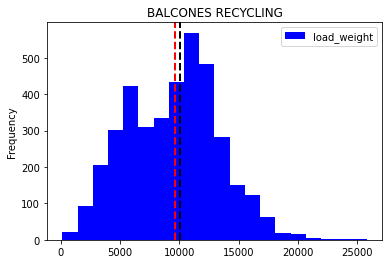

In [ ]:
# Cek distribusi data

dfBalcones.plot.hist(title='BALCONES RECYCLING', color="blue", bins=20)
plt.axvline(dfRecycle['load_weight'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(dfRecycle['load_weight'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

Note: skewness is negative because the mean value < median

In [ ]:
# Cek Skewness

dfBalcones['load_weight'].skew()

0.10148179348246143

Note : nilai skewness sebesar 0.10148179348246143 dan data masih dalam kondisi normal

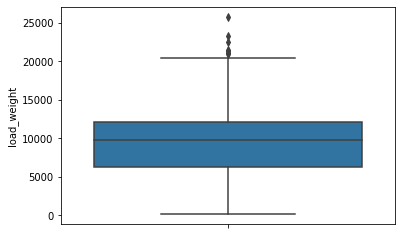

In [ ]:
sns.boxplot(data=dfBalcones, y='load_weight')

# Problem 1.5 : Check data Outlier

---



- Nilai Percentile dan Quartile dari data dfBalcones

In [ ]:
# Define Function Percentile & Quartile 

quartBal = percentile(dfBalcones['load_weight'], [25, 50, 75])
balcMin, balcMax = dfBalcones['load_weight'].min(), dfBalcones['load_weight'].max()

Q0 = quartBal[0]
Q1 = quartBal[1]
Q2 = quartBal[2]

# Print value from function

print('Nilai Minimal dfBalcones : ', balcMin)
print('Quartile ke 0 dari dfBalcones : ', Q0)
print('Quartile ke 1 dari dfBalcones : ', Q1)
print('Quartile ke 2 dari dfBalcones : ', Q2)
print('Nilai Maximal dfBalcones : ', balcMax)

Nilai Minimal dfBalcones :  140.0
Quartile ke 0 dari dfBalcones :  6260.0
Quartile ke 1 dari dfBalcones :  9840.0
Quartile ke 2 dari dfBalcones :  12080.0
Nilai Maximal dfBalcones :  25780.0


- Nilai Extreme dfBalcones

In [ ]:
# Define Function of Extreme Value

IQR = Q2 - Q0
upper = Q2 + 3 * IQR
lower = Q0 + 3 * IQR

# Print Value

print('Nilai Extreme dari dfBalcones : ', IQR)
print('Nilai Upper dari dfBalcones : ', upper)
print('Nilai Lower dari dfBalcones : ', lower)

Nilai Extreme dari dfBalcones :  5820.0
Nilai Upper dari dfBalcones :  29540.0
Nilai Lower dari dfBalcones :  23720.0


In [ ]:
# Cari data outlier berdasarkan nilai upper dfBalcones

dfBalcones.loc[dfBalcones['load_weight'] > 29540]

,load_type,load_weight,dropoff_site,date


In [ ]:
# make sure no outlier

recyclePerc = dfRecycle.loc[dfRecycle['load_weight'] > 29540].value_counts().sum()
recyclePerc

0

Note : tidak ada data outlier dari dfBalcones, jadi tidak perlu dihapus

# Problem 1.6 : Pengukuran Range, Variansi dan Standard Deviasi

---



In [ ]:
# Cari Nilai Mean, Median dan Modus dari dfBalcones

bMean = dfBalcones['load_weight'].mean()
bMed = dfBalcones['load_weight'].median()
bMod = dfBalcones['load_weight'].mode()

print('Nilai Mean dari data Balcones : ', bMean)
print('Nilai Median dari data Balcones : ', bMed)
print('Nilai Modus dari data Balcones : ', bMod)

Nilai Mean dari data Balcones :  9464.652071931196
Nilai Median dari data Balcones :  9840.0
Nilai Modus dari data Balcones :  0    11880.0
dtype: float64


In [ ]:
# Cari Nilai Var & Std dari dfBalcones

varBal = dfBalcones['load_weight'].var()
stdBal = dfBalcones['load_weight'].std()

print('Nilai Var dari data Balcones : ', varBal)
print('Nilai Std dari data Balcones : ', stdBal)

Nilai Var dari data Balcones :  14916926.032459863
Nilai Std dari data Balcones :  3862.243652653191


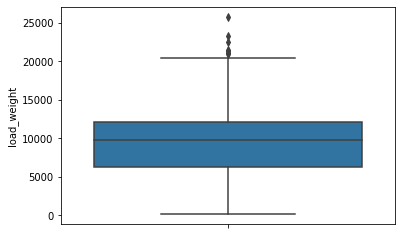

In [ ]:
sns.boxplot(data = dfBalcones, y = 'load_weight')

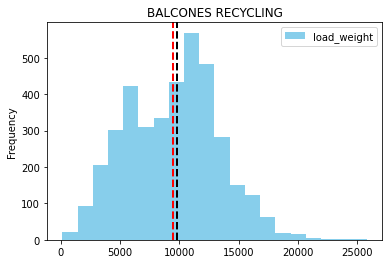

In [ ]:
dfBalcones.plot.hist(title = 'BALCONES RECYCLING', color='skyblue', bins=20)
plt.axvline(dfBalcones['load_weight'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(dfBalcones['load_weight'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

note : plot data after check the outliers in `BALCONES RECYCLING` 

- Karena tidak ada data outlier dan kita masih perlu analisa ulang setelah itu, maka perhitungannya hampir sama dengan perhitungan yang diatas

In [ ]:
# Cari Nilai Mean, Median dan Modus dari dfBalcones

bMean = dfBalcones['load_weight'].mean()
bMed = dfBalcones['load_weight'].median()
bMod = dfBalcones['load_weight'].mode()

print('Nilai Mean dari data Balcones : ', bMean)
print('Nilai Median dari data Balcones : ', bMed)
print('Nilai Modus dari data Balcones : ', bMod)

Nilai Mean dari data Balcones :  9464.652071931196
Nilai Median dari data Balcones :  9840.0
Nilai Modus dari data Balcones :  0    11880.0
dtype: float64


In [ ]:
dfBalcones.apply(pd.Series.mode)

,load_type,load_weight,dropoff_site,date
0,RECYCLING - SINGLE STREAM,11880.0,BALCONES RECYCLING,2021-03-04


note : nilai modus dari `droppoff_site` `BALCONES RECYCLING` adalah 11880

- Data Comparison
  - Data yang diambil adalah data dari site ``

In [ ]:
dfMetal = dfCopy.loc[dfCopy['load_type'] == 'RECYCLED METAL']
dfMetal

,load_type,load_weight,dropoff_site,date
1083,RECYCLED METAL,320.0,AUSTIN IRON AND METAL,2021-07-08
1314,RECYCLED METAL,520.0,AUSTIN IRON AND METAL,2021-03-02
1477,RECYCLED METAL,8260.0,ORGANICS BY GOSH,2021-03-03
2273,RECYCLED METAL,350.0,AUSTIN IRON AND METAL,2021-03-08
2529,RECYCLED METAL,280.0,AUSTIN IRON AND METAL,2021-03-09
2785,RECYCLED METAL,500.0,AUSTIN IRON AND METAL,2021-03-10
3025,RECYCLED METAL,630.0,AUSTIN IRON AND METAL,2021-03-11
3474,RECYCLED METAL,1040.0,AUSTIN IRON AND METAL,2021-03-15
4530,RECYCLED METAL,5160.0,ORGANICS BY GOSH,2021-03-22
4790,RECYCLED METAL,290.0,AUSTIN IRON AND METAL,2021-03-23


In [ ]:
dfMetal.dropoff_site.unique()

array(['AUSTIN IRON AND METAL', 'ORGANICS BY GOSH', 'MRF', 'TDS LANDFILL'],
      dtype=object)

note : ada 4 site yang dikhususkan untuk pengolahan limbah `RECYCLED METAL`

In [ ]:
totalMetal = dfMetal.groupby(dfMetal['dropoff_site'],sort=True).sum()
totalMetal

,load_weight
dropoff_site,
AUSTIN IRON AND METAL,22560.0
MRF,230.0
ORGANICS BY GOSH,62660.0
TDS LANDFILL,220.0


note : data pembanding yang menarik perhatian yaitu site `ORGANICS BY GOSH` karena limbah yang diolah cukup besar

In [ ]:
dfOrganics = dfMetal.loc[dfMetal['dropoff_site'] == 'ORGANICS BY GOSH']
dfOrganics

,load_type,load_weight,dropoff_site,date
1477,RECYCLED METAL,8260.0,ORGANICS BY GOSH,2021-03-03
4530,RECYCLED METAL,5160.0,ORGANICS BY GOSH,2021-03-22
6445,RECYCLED METAL,17440.0,ORGANICS BY GOSH,2021-04-02
7814,RECYCLED METAL,20760.0,ORGANICS BY GOSH,2021-04-13
16644,RECYCLED METAL,11040.0,ORGANICS BY GOSH,2021-06-17


In [ ]:
totalOrganics = dfOrganics['load_weight'].sum()
totalOrganics

62660.0

note : total limbah `RECYCLED METAL` yang ada di site `ORGANICS BY GOSH` adalah 62660

- Nilai Mean, Median, Modus, Variansi dan Standard Deviasi dari site `ORGANICS BY GOSH`

In [ ]:
# Define Function Mean, Median, Mode, Variance & Standar

orgMean = dfOrganics['load_weight'].mean()
orgMed = dfOrganics['load_weight'].median()
orgMod = dfOrganics['load_weight'].mode()
orgVar = dfOrganics['load_weight'].var()
orgStd = dfOrganics['load_weight'].std()

# Print Value

print('Nilai Mean dari data ORGANICS BY GOSH : ', orgMean)
print('Nilai Median dari data ORGANICS BY GOSH : ', orgMed)
print('Nilai Modus dari data ORGANICS BY GOSH :\n', orgMod)
print('Nilai Variansi dari data ORGANICS BY GOSH : ', orgVar)
print('Nilai Standard dari data ORGANICS BY GOSH : ', orgStd)

Nilai Mean dari data ORGANICS BY GOSH :  12532.0
Nilai Median dari data ORGANICS BY GOSH :  11040.0
Nilai Modus dari data ORGANICS BY GOSH :
 0     5160.0
1     8260.0
2    11040.0
3    17440.0
4    20760.0
dtype: float64
Nilai Variansi dari data ORGANICS BY GOSH :  41652720.0
Nilai Standard dari data ORGANICS BY GOSH :  6453.891849109342


- Create Distribution Plot of `ORGANICS BY GOSH`

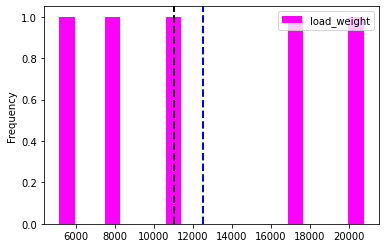

In [ ]:
# Ploting of Distribution Plot

dfOrganics.plot.hist(Label = 'ORGANICS BY GOSH', color='magenta', bins=20)
plt.axvline(orgMean, color='blue', linestyle='dashed', linewidth=2)
plt.axvline(orgMed, color='black', linestyle='dashed', linewidth=2)
plt.show()

- Check skewness 

In [ ]:
dfOrganics['load_weight'].skew()

0.2996635625809256

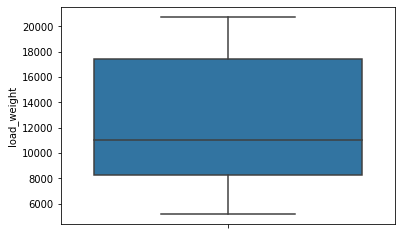

In [ ]:
sns.boxplot(data = dfOrganics, y = 'load_weight')

- Nilai Percentile dan Quartile dari `ORGANICS BY GOSH`

In [ ]:
# Define Function Percentile & Quartile

quartOrg = percentile(dfOrganics['load_weight'], [25, 50, 75])
orgMin, orgMax = dfOrganics['load_weight'].min(), dfOrganics['load_weight'].max()

Q0 = quartOrg[0]
Q1 = quartOrg[1]
Q2 = quartOrg[2]

# Print Value

print('Nilai Minimal dfOrganics : ', balcMin)
print('Quartile ke 0 dari dfOrganics : ', Q0)
print('Quartile ke 1 dari dfOrganics : ', Q1)
print('Quartile ke 2 dari dfOrganics : ', Q2)
print('Nilai Maximal dfOrganics : ', balcMax)

Nilai Minimal dfOrganics :  140.0
Quartile ke 0 dari dfOrganics :  8260.0
Quartile ke 1 dari dfOrganics :  11040.0
Quartile ke 2 dari dfOrganics :  17440.0
Nilai Maximal dfOrganics :  25780.0


# Problem 1.7 : Interval Confidence

---



In [ ]:
# Fungsi Interval Confidence antara dfBalcones & dfOrganics

ci = stats.norm.interval(0.95, dfBalcones['load_weight'].mean(), dfOrganics['load_weight'].std())

# print fungsi

print('Interval Confident C0 : ', ci[0])
print('Interval Confident C1 : ', ci[1])

Interval Confident C0 :  -3184.743512439727
Interval Confident C1 :  22114.04765630212


# Problem 1.8 : Analisa Uji Hipotesis

---



Berikut Hipotesis Awal pengujian

- H0 : μ `BALCONES RECYCLING` `load_weight` = μ `ORGANICS BY GOSH` `load_weight`
- H1 : μ `BALCONES RECYCLING` `load_weight` != μ `ORGANICS BY GOSH` `load_weight`

- setelah kita menganilsa dan membandingkan 2 site yaitu `BALCONES RECYCLING` dengan `ORGANICS BY GOSH`, maka kita akan menggunakan t-test untuk Analisa Uji Hipotesis

In [ ]:
# Define Function tTest & pValue

t_stat, p_value = stats.ttest_ind(dfBalcones['load_weight'], dfOrganics['load_weight'])

# Print Value

print('Hasil T-Test : ', t_stat)
print('Hasil P_Value : ', p_value)

Hasil T-Test :  -1.773048272681914
Hasil P_Value :  0.07629996166984572


Interval Confident C0 :  -3184.743512439727
Interval Confident C1 :  22114.04765630212


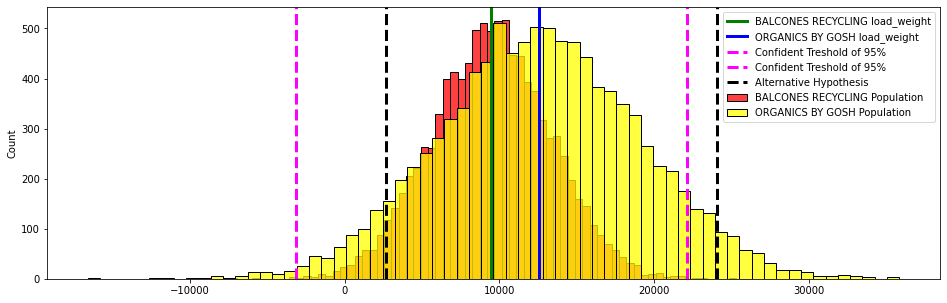

In [ ]:
# Random Sampel Populasi Limbah
balconesPop = np.random.normal(dfBalcones['load_weight'].mean(), dfBalcones['load_weight'].std(), 10000)
organicsPop = np.random.normal(dfOrganics['load_weight'].mean(), dfOrganics['load_weight'].std(), 10000)

# Interval Confident
ci = stats.norm.interval(0.95, dfBalcones['load_weight'].mean(), dfOrganics['load_weight'].std())

plt.figure(figsize=(16,5))
sns.histplot(balconesPop, label='BALCONES RECYCLING Population', color='red')
sns.histplot(organicsPop, label='ORGANICS BY GOSH Population', color='yellow')

# Mean Value
plt.axvline(dfBalcones['load_weight'].mean(), color='green', linewidth=3, label='BALCONES RECYCLING load_weight')
plt.axvline(dfOrganics['load_weight'].mean(), color='blue', linewidth=3, label='ORGANICS BY GOSH load_weight')

plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=3, label='Confident Treshold of 95%')
plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=3, label='Confident Treshold of 95%')

# Alternative Hypothesis
plt.axvline(balconesPop.mean() + t_stat * balconesPop.std(), color="black", linestyle='dashed', linewidth=3, label='Alternative Hypothesis')
plt.axvline(organicsPop.mean() - t_stat * organicsPop.std(), color="black", linestyle='dashed', linewidth=3)

# Ploting
plt.legend()
print('Interval Confident C0 : ', ci[0])
print('Interval Confident C1 : ', ci[1])

Note: Based on the above results, we can conclude that we failed to reject the null hypothesis that BALCONES RECYCLING and ORGANICS BY GOSH are not significantly different in handling recyclable waste. From each site for the processing of recycled type waste is almost the same amount, both from `RECYCLED - SINGLE STREAM` type waste and `RECYCLED - METAL` type waste.

# Question Mark - Problem 1

---





1.   Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!
  - Saya menggunakan teknik Z-Score untuk handling outlier dari data yang berdistribusi normal
2. Apa konsep dibalik confidence interval sehingga kita dapat menggunakannya untuk menyelesaikan langkah pada nomor 7?
  - Konsep Interval Confidence digunakan untuk mengetahui seakurat mungkin range data yang digunakan untuk masing-masing `dropoff_site`.  Biasanya kita menggunakan persentase senilai 95% karena kita menggunakan Hypothesis Awal Two Sample Two Tail, agar rata-rata data yang didapatkan tidak berbeda jauh dari batas atas dan batas bawah data
3. Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?
  - Saya menggunakan Hypothesis Two Sampel Two Tail (2S2T) karena saya ingin mengetahui apakah Jenis sampah yang bertipe daur ulang yang diproses di kedua `dropoff_site` sama banyaknya, dan ternyata hasil dari Hypothesis menunjukan bahwa tidak terlalu banyak perbedaan jenis sampah bertipe daur ulang yang diproses dikedua site, sehingga disimpulkan kita tidak dapat menolah Hypothesis nol



# Problem 2 - Math/Calculus

---



Kita sudah punya formula untuk memprediksi sampah ditanggal 10-07-2021

---
Formulanya

**W`(tomorrow)` = W`today` + V * delta t**


---





In [ ]:
# Grouping data base on date

dfPredict = dfCopy.groupby('date')['load_weight'].sum().to_frame()
dfPredict

,load_weight
date,
2021-01-01,4.890855e+04
2021-01-02,2.206811e+06
2021-01-04,2.920260e+06
2021-01-05,2.400767e+06
2021-01-06,2.457686e+06
...,...
2021-07-05,1.897290e+06
2021-07-06,1.995003e+06
2021-07-07,1.663124e+06


note : ada 166 baris data berdasarkan `date` dan `load_weight`

Now count the differential of our data and dividing with the differential of our data range

In [ ]:
# Hitung Selisih Data kemudian dibagi dengan panjang data
# Define Function

vData = np.diff(dfPredict['load_weight'])/np.diff(range(166))
vData

array([ 2.15790286e+06,  7.13448591e+05, -5.19492864e+05,  5.69185452e+04,
        6.62342726e+04, -6.05607136e+05, -1.85349141e+06,  2.44401573e+06,
       -4.22690000e+05,  6.80228178e+04,  6.20870905e+04, -3.89222818e+05,
       -1.73103855e+06,  2.39456286e+06, -1.81800046e+05, -1.79943185e+04,
       -9.08956815e+04, -3.23451409e+05, -1.64462855e+06,  2.33922427e+06,
       -4.64654273e+05,  1.03752818e+05, -4.61408922e+02, -4.13344273e+05,
       -1.74725714e+06,  2.40265859e+06, -3.60620000e+05, -5.02985911e+04,
        1.16700000e+05, -3.35988591e+05, -1.75790427e+06, -4.94156815e+04,
        2.65705855e+06, -3.84905773e+05,  1.00618499e+05, -1.50721418e+06,
        1.02882432e+06, -1.87568141e+06,  1.05132000e+06,  2.66098000e+06,
       -5.04400000e+05,  1.48152818e+05,  5.15028637e+04, -9.24291455e+05,
       -2.21702855e+06, -4.52156815e+04,  2.95084000e+06, -2.95220000e+05,
       -8.62290954e+03,  1.01885452e+04, -3.54825000e+05, -2.24757782e+06,
       -1.24182818e+05,  

In [ ]:
# Lakukan perhitungan untuk prediksi data
# Define Function

wTomorrow = dfPredict['load_weight'][-1] + vData[-1] * 1
abs(wTomorrow)

1189197.1363072763

note : hasil prediksi total Volume sampah yang ada di tanggal 10-07-2021 sebanyak 1189197.1363072763

# Question Mark - Problem 2

---





1.   Untuk menghitung turunan pertama dapat digunakan metode simbolik dan numerik, untuk kasus ini, teknik apa yang kamu gunakan?
  - Saya menggunakan rumus fungsi yang telah disediakan oleh library numpy yaitu `.diff()`
2. Apakah kamu membutuhkan fungsi matematis untuk menghitung turunannya? (ya/tidak) berikan alasanmu!
  - Ya, karena fungsi matematis dapat mempercepat proses perhitungan sebuah masalah, dalam kasus ini untuk prediksi total volume sampah di tanggal 10-07-2021
3. Berapa load weight yang kamu perkirakan di hari esok (10 Juli 2021)?
  - Total `load_weight` di tanggal 10-07-2021 = 1189197.1363072763



# Conclusion


---



In [ ]:
# Function to Check Total Volume of Waste

volAll = dfCopy['load_weight'].sum()

# Function to Check Total Volume of load_type == 'RECYCLING - SINGLE STREAM'

volRecycle = dfRecycle['load_weight'].sum()

# Function to Check Total Volume of load_type == 'RECYCLED METAL'

volMetal = dfMetal['load_weight'].sum()

# Function to Check total Recycled - Waste

volRecMet = volMetal + volRecycle

# Function to Check the percentage of Recycled Waste

percentWaste = (volRecycle + volMetal) / volAll * 100

# Print Value

print('Total Volume of Waste : ', volAll.round(decimals = 2))
print('Total Volume of RECYCLING - SINGLE STREAM : ', volRecycle)
print('Total Volume of RECYCLING METAL : ', volMetal)
print('Volume total of Recycle - Waste : ', volRecMet)
print('Percentage : ', percentWaste.round(decimals=2), '%')

Total Volume of Waste :  319825204.39
Total Volume of RECYCLING - SINGLE STREAM :  64954430.0
Total Volume of RECYCLING METAL :  85670.0
Volume total of Recycle - Waste :  65040100.0
Percentage :  20.34 %



1.   The total volume of waste in the city of Austin as of 09-07-2021 was 319,825,204.39 with recycled type waste, be it `RECYCLING - SINGLE STREAM` or `RECYCLED METAL` as much as 65,040,100 or about 20.34% of the total waste. Making it the second largest type of waste. The Austin city government may be able to add `dropoff_sites` to process this recyclable waste so that this type of waste can be reused by the people of Austin. 
2.   We see that the distribution of waste data in the city of Austin has been well implemented with the normal distribution weights. If the waste data is not well distributed, then I hope the Austin city government can be more specific to manage the waste distribution data in the city of Austin so that the government can know how to handle each type of waste.